--------    -------------------------------------------
#### Goal
-------------------

To build and ANN model for predicting flower species

- We will build a deep learning model to predict the type of flower with the iris data set
- The Iris data set is popular machine learning data set
- The data set has four feature variables about the flower namely
    1. Sepal length
    2. Sepal width
    3. Petal length
    4. Petal width
- The target class is the type of species.
- There are three classes  namely
    1. Setosa
    2. Versicolor
    3. Virginica



In [161]:
# importing libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [162]:
## Loading data into a pandas dataframe
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data pre-processing

- The target variable contains string values, so we need to convert the string values to numeric form
- I will use a Label encoder to convert String to numeric values 

In [163]:
# species composition
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [164]:
# converting values in target variable to numeric form
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [165]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

- We need to convert the dataframe into numpy array becuse it is the preferred input format for deep learning

In [166]:
# converting df to numpy
df_np = df.to_numpy()

In [167]:
df_np[0:5,:]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [168]:
#Separating feature (X) and target(y) variables

X = df_np[:,0:4]
y = df_np[:,4]
print('Features before scaling \n-------------------------------------------')
print(X[:5,:])
print('\nTarget before scaling  \n-------------------------------------------')
print(y[:5])

Features before scaling 
-------------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling  
-------------------------------------------
[0. 0. 0. 0. 0.]


- Since the feaure variables are numeric and each column may be on a different scale, we need to standardize these numeric values to avoid disproportionate effect on the model

In [169]:
# creating a scaler model to fit on input data
scaler = StandardScaler().fit(X)
# transforming the data in X using the scaler model
print('Features after scaling \n------------------------------')
X = scaler.transform(X)
print(X[:5,:])

Features after scaling 
------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


- Since the target variable is multi class, I will use one hot encoding to create three columns with each column representing a species.

In [170]:
# Converting the target variable as a one-hot-encoding array
y = tf.keras.utils.to_categorical(y,3)
print('Target variable after one-hot-encoding \n----------------------')
print(y[:5])

Target variable after one-hot-encoding 
----------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [171]:
# splitting the dataset into train and test sets
# 10 % of the data is allocated for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=20)
print('Train - Test dimensions \n-------------------------------')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Train - Test dimensions 
-------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


- I am not splitting for validation as keras has a feature to create validation data set from the training data set.

## Building the model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [172]:
from tensorflow import keras

- Let's define the architecture and hyperparameters for the neural network

In [173]:
# Number of classes in the target variable
Nb_classes = 3

# creating a sequenctial model in keras 
model = tf.keras.models.Sequential()

# Adding the first hidden layer 
model.add(keras.layers.Dense(128,                                #Number of nodes             
                            input_shape = (4,),                  #Number of input variables
                            name = 'Hidden-Layer-1',             #Logical name
                            activation = 'relu'))                #activation function

# Adding a second hidden layer
model.add(keras.layers.Dense(128,
                            input_shape = (4,),
                            name = 'Hidden-Layer-2',
                            activation = 'relu'))

# Adding an output layer with Softmax activation function
model.add(keras.layers.Dense(Nb_classes,
                            name = 'Output-Layer',
                            activation = 'softmax'))

# compiling the model with Loss and metrics
model.compile(loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and Evaluating the model

- Setting the hyper parameters for training, initally based on intuition and then these hyperparameters will be fine tuned on experimentation.
- Setting verbose as 1 so that we can see the progress
- setting batch size as 16 which is in the 2\**n range
- setting the number of epochs as 10 
- I will use a validation split of 20% : 20% of the training data will be used by keras for validation after each epoch.
- Though the recommended percentage of validation is 10, I am using 20% as the total sample size is only 150

In [174]:
# Training the mdoel
history = model.fit(X_train,
                   y_train,
                   batch_size=16,
                   epochs = 10,
                   verbose=1,
                   validation_split=.2)

Epoch 1/10
7/7 [==============================] - 1s 34ms/step - loss: 0.8520 - accuracy: 0.6944 - val_loss: 0.4889 - val_accuracy: 0.8889
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5724 - accuracy: 0.8241 - val_loss: 0.3428 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4673 - accuracy: 0.8426 - val_loss: 0.2834 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4039 - accuracy: 0.8426 - val_loss: 0.2590 - val_accuracy: 0.8889
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3631 - accuracy: 0.8426 - val_loss: 0.2276 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.8611 - val_loss: 0.2230 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2942 - accuracy: 0.8981 - val_loss: 0.1939 - val_accuracy: 0.9259
Epoch 8/10
7/7 [================

- on 10th epoch model has accuracy of 94.44% on training set and 92.59 on validation set

In [178]:
history.history['accuracy']

[0.6944444179534912,
 0.8240740895271301,
 0.8425925970077515,
 0.8425925970077515,
 0.8425925970077515,
 0.8611111044883728,
 0.8981481194496155,
 0.8796296119689941,
 0.8981481194496155,
 0.9444444179534912]

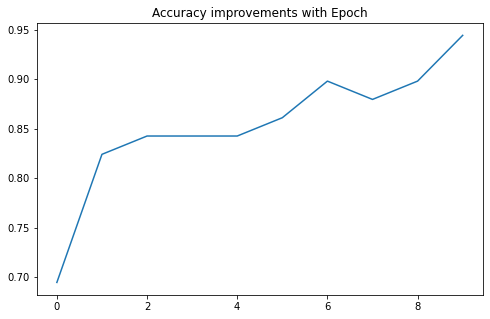

In [179]:
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

- As the number of epochs increases the accuracy also increases progressively and reaches 94.44%


#### Evaluating the model against test set

In [180]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.2445 - accuracy: 0.9333


[0.24451814591884613, 0.9333333373069763]

- Model accuracy on test set : 93.33%

## Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [181]:
# saving the model
model.save('Iris_saved_model')

# Loading the saved model
loaded_model = keras.models.load_model('iris_saved_model')

# printing summary of loaded model
print(loaded_model.summary())


INFO:tensorflow:Assets written to: Iris_saved_model\assets


INFO:tensorflow:Assets written to: Iris_saved_model\assets


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
None


## Prediction using deep learning model

- Now that the model has been trained well, let's do some predictions with new data

In [184]:
# Inserting flower features as raw prediction data 
prediction_input = [[6.6, 3. , 4.4, 1.4]]

# Scaling prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# getting prediction probabilities
raw_pred = model.predict(scaled_input)
print("\nRaw Prediction Output (Probabilities) :" , raw_pred)

# finding the predicted species of flower
prediction = np.argmax(raw_pred)
print('\nPredicted flower species is :',label_encoder.inverse_transform([prediction]))


1/1 [==============================] - 0s 31ms/step

Raw Prediction Output (Probabilities) : [[0.02904807 0.6296591  0.3412928 ]]

Predicted flower species is : ['versicolor']


- Here row_pred gives is the list of probabilities of the various classes of species (for the provided input data)
- Argmax function is used to find the index of the highest probability and then used inverse transform to get the flower species.